# In this notebook we load and plot binned data after normalization and masking correction from JPARC Nancy's experiment Oct2018

In [2]:
import numpy as np
import math
# import sympy as sp
# import matplotlib
import matplotlib.pyplot as plt
# import pandas as pd
from astropy.io import fits
import os, fnmatch
from os import listdir
# %matplotlib inline
%matplotlib notebook
import scipy.signal as sig
import matplotlib.patches as patches

In [3]:
h=6.62607004e-34 #Planck constant [m^2 kg / s]
m=1.674927471e-27 #Neutron mass [kg]
t0=0.0
L= 34.8 #[m]
dL = 0

In [4]:
def tof2l(tof):
    l=h/m*(tof-t0)/(L+dL)/1e-10   #l is the wavelength in Angstrom
    return l

def l2tof(l):
    tof=t0+(l*1e-10)*(L+dL)*m/h
    return tof

In [5]:
pathdata1 = "/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/S1_bin/"
pathdata1_my = "/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/masked_datapath/S1_bin_corrected/"
# pathOB = "/Oct-Japan/563_SENJU_Oct2018_Robin/1_test/binning/OB-detector-474/OB1/"
pathOB = "/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/OB1/"

pathdata4 = "/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/S4_bin/"
pathdata4_my = "/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/radiographs/masked_datapath/S4_bin_corrected/"

myTOF = np.genfromtxt('/Oct-Japan/563_SENJU_Oct2018_Robin/bin_test/Batt_475_Spectra.txt', usecols=0)

In [6]:
#read fits files 
coll_files1 = fnmatch.filter(listdir(pathdata1),'*.fits')
coll_files1_my = fnmatch.filter(listdir(pathdata1_my),'*.fits')

coll_files4 = fnmatch.filter(listdir(pathdata4),'*.fits')
coll_files4_my = fnmatch.filter(listdir(pathdata4_my),'*.fits')

coll_files_OB = fnmatch.filter(listdir(pathOB),'*.fits')

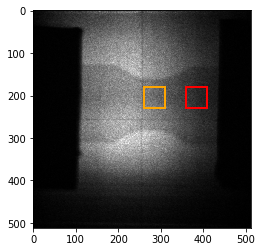

In [7]:
#determine the ROI 
roi_side=np.array([360,180,410,230]) # (x1,y1,x2,y2 across the diagnol starting from up to down) outside sample
roi=np.array([260,180,310,230]) # (x1,y1,x2,y2 across the diagnol starting from up to down)
fig,ax =plt.subplots()
myim=fits.open(pathdata1+coll_files1[150])[0].data.astype(float)
ax.imshow(myim, vmin=0, vmax=150, cmap="gray")
roi_p= patches.Polygon([(260,180),(310,180),(310,230),(260,230)], edgecolor='orange', facecolor='none',  linewidth=2)
roi_p_side= patches.Polygon([(360,180),(410,180),(410,230),(360,230)], edgecolor='red', facecolor='none',  linewidth=2)
ax.add_patch(roi_p)
ax.add_patch(roi_p_side)

In [8]:
#creating files with zero intensity for both the sample and the OB
spectrum_sample1 = np.zeros(len(coll_files1))
spectrum_sample1_my = np.zeros(len(coll_files1_my))
spectrum_sample4 = np.zeros(len(coll_files4))
spectrum_sample4_my = np.zeros(len(coll_files4_my))
spectrum_OB = np.zeros(len(coll_files_OB))
# print(len(coll_files))

for i in range(0, len(coll_files1)):
    im1=(fits.open(pathdata1+coll_files1[i])[0].data[roi[1]:roi[3],roi[0]:roi[2]]).astype(float)
    im1_my=(fits.open(pathdata1_my+coll_files1_my[i])[0].data[roi[1]:roi[3],roi[0]:roi[2]]).astype(float)
    im4=(fits.open(pathdata4+coll_files4[i])[0].data[roi[1]:roi[3],roi[0]:roi[2]]).astype(float)
    im4_my=(fits.open(pathdata4_my+coll_files4_my[i])[0].data[roi[1]:roi[3],roi[0]:roi[2]]).astype(float)
    ob=(fits.open(pathOB+coll_files_OB[i])[0].data[roi[1]:roi[3],roi[0]:roi[2]]).astype(float)
    
#adding the intensity in each fits file to one value for each time slot(wavelength)
    spectrum_sample1[i]=np.sum(im1[~np.isnan(im1) & ~np.isinf(im1)])
    spectrum_sample1_my[i]=np.sum(im1_my[~np.isnan(im1_my) & ~np.isinf(im1_my)])
    spectrum_sample4[i]=np.sum(im4[~np.isnan(im4) & ~np.isinf(im4)])
    spectrum_sample4_my[i]=np.sum(im4_my[~np.isnan(im4_my) & ~np.isinf(im4_my)])
    spectrum_OB[i]=np.sum(ob[~np.isnan(ob) & ~np.isinf(ob)])


In [9]:
spectrum_norm1=(spectrum_sample1/spectrum_OB)
filtered_norm1 = sig.medfilt(spectrum_norm1)
spectrum_norm1_my=(spectrum_sample1_my/spectrum_OB)
filtered_norm1_my = sig.medfilt(spectrum_norm1_my)

# spectrum_norm1_side=(spectrum_sample1_side/spectrum_OB_side)
# filtered_norm1_side = sig.medfilt(spectrum_norm1_side)
# spectrum_norm4_side=(spectrum_sample4_side/spectrum_OB_side)
# filtered_norm4_side = sig.medfilt(spectrum_norm4_side)
mylambda=tof2l(myTOF)

In [10]:
spectrum_norm4=(spectrum_sample4/spectrum_OB)
filtered_norm4 = sig.medfilt(spectrum_norm4)
spectrum_norm4_my=(spectrum_sample4_my/spectrum_OB)
filtered_norm4_my = sig.medfilt(spectrum_norm4_my)

In [11]:
print(math.log(10))
print(type(spectrum_norm1))

2.302585092994046
<class 'numpy.ndarray'>


In [12]:
# thickness of the sample is 3 mm to cm as the cross section will be in barn
atten_coeff1=(np.log(spectrum_norm1)/-0.3)
atten_coeff4=(np.log(spectrum_norm4)/-0.3)

Text(0, 0.5, 'Macroscopic cross section (cm$^{-1}$)')

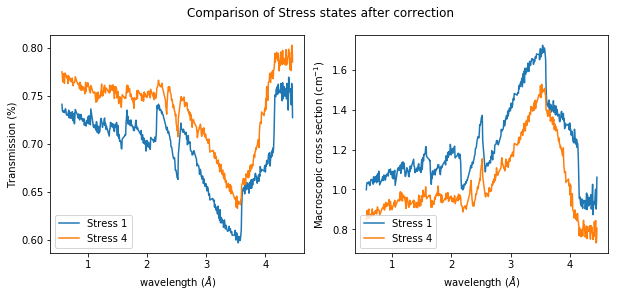

In [13]:
fig,ax =plt.subplots(figsize=(10,4))
fig.suptitle('Comparison of Stress states after correction')
plt.subplot(1, 2, 1)
plt.plot(mylambda, spectrum_norm1)
plt.plot(mylambda, spectrum_norm4)
plt.xlabel('wavelength ($\AA$)')
plt.legend(['Stress 1', 'Stress 4'], loc='lower left')
# plt.xlim([4.3,4.4])
plt.ylabel('Transmission (%)')
plt.subplot(1, 2, 2)
plt.plot(mylambda, atten_coeff1)
plt.plot(mylambda, atten_coeff4)
plt.xlabel('wavelength ($\AA$)')
plt.legend(['Stress 1', 'Stress 4'], loc='lower left')
# plt.xlim([4.3,4.4])
plt.ylabel('Macroscopic cross section (cm$^{-1}$)')

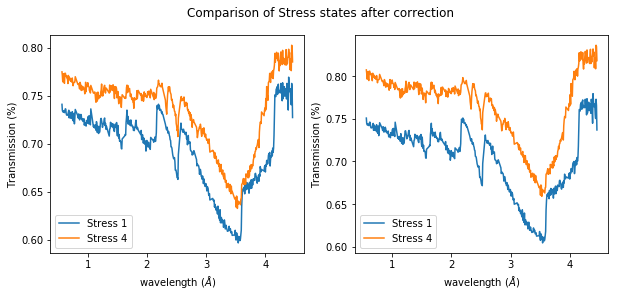

In [14]:
# fig,ax =plt.subplots(figsize=(10, 5))
fig,ax =plt.subplots(figsize=(10,4))
fig.suptitle('Comparison of Stress states after correction')
plt.subplot(1, 2, 1)
plt.plot(mylambda, spectrum_norm1)
plt.plot(mylambda, spectrum_norm4)
# ax.annotate('BCC (211)', xy=(2.35, 0.77), xytext=(2.5, 0.8),arrowprops=dict(facecolor='black', shrink=0.005),)
plt.xlabel('wavelength ($\AA$)')
plt.legend(['Stress 1', 'Stress 4'], loc='lower left')
# plt.xlim([4.3,4.4])
plt.ylabel('Transmission (%)')
plt.subplot(1, 2, 2)
plt.xlabel('wavelength ($\AA$)')
plt.ylabel('Transmission (%)')
plt.plot(mylambda, spectrum_norm1_my)
plt.plot(mylambda, spectrum_norm4_my)
plt.legend(['Stress 1', 'Stress 4'], loc='lower left')
plt.savefig('comparison_of_stress states after correction.png')

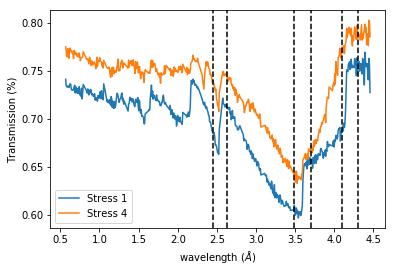

In [19]:
# fig,ax =plt.subplots(figsize=(10, 5))
fig,ax =plt.subplots()


plt.plot(mylambda, spectrum_norm1)
plt.plot(mylambda, spectrum_norm4)
plt.axvline(x=2.45,color='k', linestyle='--')
plt.axvline(x=2.63,color='k', linestyle='--')
plt.axvline(x=3.48,color='k', linestyle='--')
plt.axvline(x=3.7,color='k', linestyle='--')
plt.axvline(x=4.1,color='k', linestyle='--')
plt.axvline(x=4.3,color='k', linestyle='--')
# ax.annotate('BCC (211)', xy=(2.35, 0.77), xytext=(2.5, 0.8),arrowprops=dict(facecolor='black', shrink=0.005),)
plt.ylabel('Transmission (%)')
plt.xlabel('wavelength ($\AA$)')
plt.legend(['Stress 1', 'Stress 4'], loc='lower left')
plt.savefig('range_for CT.png')